# PythonTraining_0002_vibration

# 主軸振動測定結果の分析と結果のグラフ化
Analysis of spindle vibration measurement results and graphing of results

モジュールを読み込む。<br>
Import modules.

In [338]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as sgl
import scipy.fft as fft

csvファイルのパスを指定して、csvファイルをDataFrameとして読み込む。<br>
Type the path of the csv file and read the csv file as a DataFrame.

In [339]:
file_path = os.path.join('VibData', 'S1800_120ksps_VibLevel2.csv')
df = pd.read_csv(file_path)

読み込んだデータを5点だけ表示する。<br>
Display only five points of data that have been read.

In [340]:
df.head()

,Sensor1
0,-73
1,613
2,847
3,565
4,-216


"Sensor1"は生のセンサ出力値なので、係数をかけて加速度の単位に換算する。新しく"Acc[G]"と名付けた列に換算結果を格納する。<br>
Since "Sensor1" is the raw sensor output value, convert it to acceleration units by multiplying it by a factor. The conversion result is stored in a new column named "Acc[G]".

In [341]:
df["Acc [G]"] = df["Sensor1"] * 0.0003815

もう一度、5行目まで表示する。<br>
Display up to the 5th line again.

In [342]:
df.head()

,Sensor1,Acc [G]
0,-73,-0.027849
1,613,0.233859
2,847,0.323130
3,565,0.215548
4,-216,-0.082404


"Acc[G]"がどのような波形なのか、とりあえず見てみる。<br>
See what kind of waveform "Acc[G]" has.

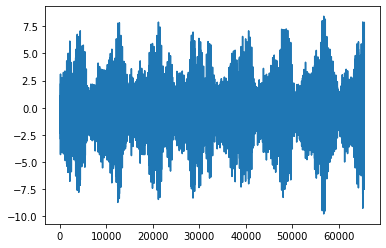

In [343]:
plt.plot(df["Acc [G]"])

波形から読み取れること　・・・　データ点数は約65000点。振幅は約4G。<br>
It can be read from the waveform ... The number of data points is about 65,000. Amplitude is about 4G.

データ点数を調べる。<br>
Check the number of data.

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65536 entries, 0 to 65535
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sensor1  65536 non-null  int64  
 1   Acc [G]  65536 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.0 MB


グラフの横軸を時間にするために、DataFrameに新しく"Time[sec]"と名付けた列を作り、サンプリング周波数120kHzを使って計算した時間を格納する。<br>
In order to set the horizontal axis of the graph to time, create a new column named "Time [sec]" in the DataFrame and store the time calculated using the sampling frequency of 120kHz.

In [345]:
df["Time [sec]"] = 0.0

In [346]:
for index in range(len(df)):
  df.at[index, "Time [sec]"] = index / (120.0*1000.0)

横軸を時間にしてグラフを書く。<br>
Draw a graph with time on the horizontal axis.

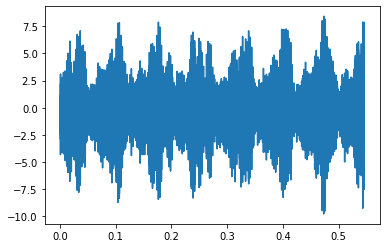

In [347]:
plt.plot(df["Time [sec]"], df["Acc [G]"])

グラフを横に引き延ばすことで、見易さを改善する。<br>
Improve visibility by stretching the graph horizontally.

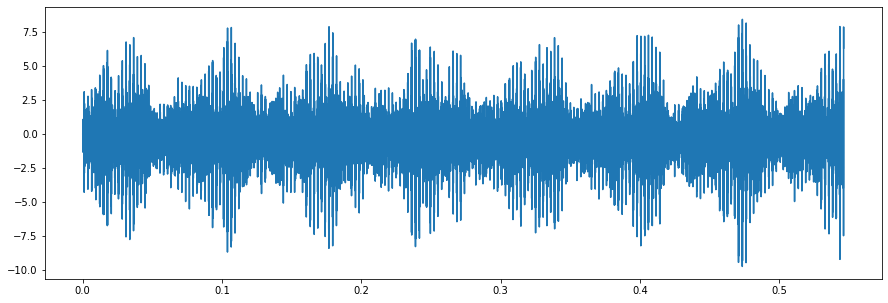

In [348]:
fig = plt.figure(figsize = (15,5))
plt.plot(df["Time [sec]"], df["Acc [G]"])

縦軸・横軸、線色などを調整する。<br>
Adjust the vertical axes, horizontal axes and line color etc.<br>
<br>
https://matplotlib.org/examples/color/named_colors.html

(-5.0, 5.0)

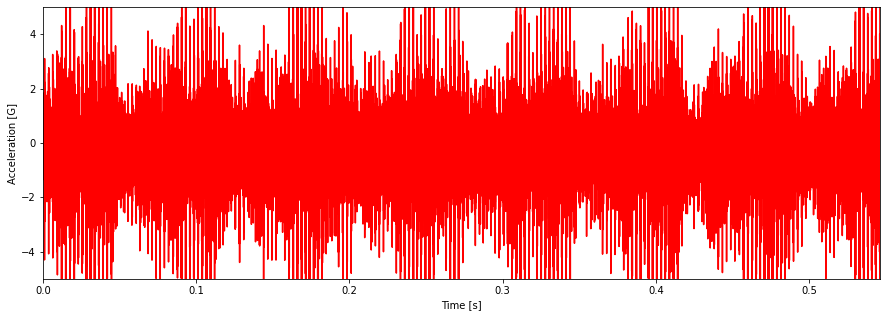

In [349]:
fig = plt.figure(figsize = (15,5))
plt.plot(df["Time [sec]"], df["Acc [G]"], color = "red")
plt.xlabel("Time [s]")
plt.ylabel("Acceleration [G]")
plt.xlim([df.at[0, "Time [sec]"], df.at[len(df)-1, "Time [sec]"]]) 
plt.ylim([-5,5])

DataFrameに新しく"Envelope[G]"と名付けた列を作り、計算したエンベロープ波形を格納する。<br>
Create a new column named "Envelope [G]" in the DataFrame and store the calculated envelope waveform.

In [350]:
df["Envelope [G]"] = abs(sgl.hilbert(df["Acc [G]"]))
df.head()

,Sensor1,Acc [G],Time [sec],Envelope [G]
0,-73,-0.027849,0.000000,5.254394
1,613,0.233859,0.000008,1.753827
2,847,0.323130,0.000017,2.263672
3,565,0.215548,0.000025,1.568789
4,-216,-0.082404,0.000033,1.992295


エンベロープ波形をグラフ表示する。<br>
Display the envelope waveform as a graph.

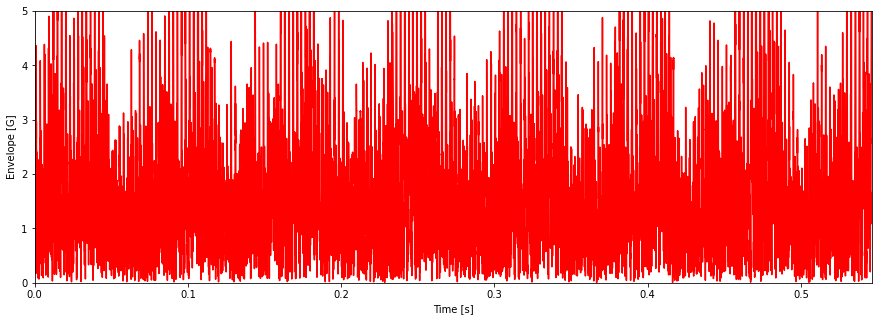

In [351]:
fig = plt.figure(figsize = (15,5))
plt.plot(df["Time [sec]"], df["Envelope [G]"], color = "red")
plt.xlabel("Time [s]")
plt.ylabel("Envelope [G]")
plt.xlim([df.at[0, "Time [sec]"], df.at[len(df)-1, "Time [sec]"]]) 
plt.ylim([0,5])
plt.show()

生波形をFFTで周波数分析する。<br>
Analyze the frequency of the raw waveform using FFT.

In [352]:
RawFFT = fft.fft(df["Acc [G]"].values)
RawMag = 2 * np.abs(RawFFT[0:int(len(df))]) / len(df)
RawF = fft.fftfreq(len(df), 1/(120*1000))
f = RawF[0:int(len(df))]

生波形の周波数分析結果をグラフ表示する。<br>
Display the frequency analysis result of the raw waveform as a graph.

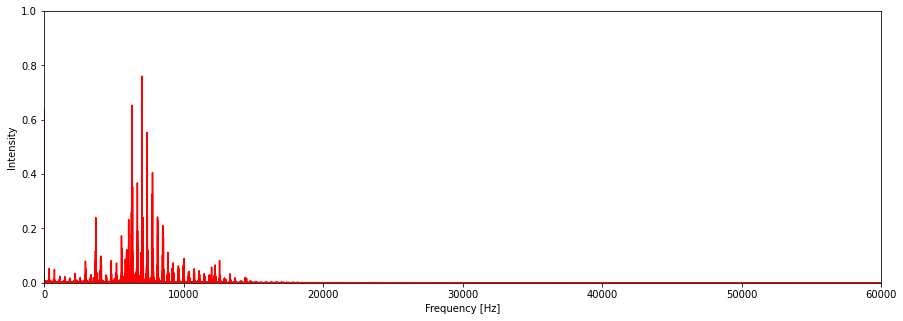

In [353]:
fig = plt.figure(figsize = (15,5))
plt.plot(f, RawMag, color = "red")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Intensity")
plt.xlim(0, 60000) 
plt.ylim([0,1])
plt.show()

600Hzまでの範囲に変更する。<br>
Change the display range to 600Hz.

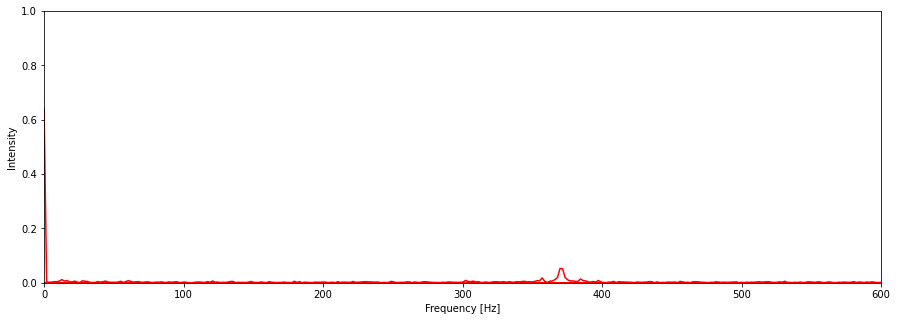

In [354]:
fig = plt.figure(figsize = (15,5))
plt.plot(f, RawMag, color = "red")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Intensity")
plt.xlim(0, 600) 
plt.ylim([0,1])
plt.show()

エンベロープ波形をFFTで周波数分析する。<br>
Analyze the frequency of envelope waveform using FFT.

In [355]:
EnvFFT = fft.fft(df["Envelope [G]"].values)
EnvMag = 2 * np.abs(EnvFFT[0:int(len(df))]) / len(df)

エンベロープ波形の周波数分析結果をグラフ表示する。<br>
Display the frequency analysis result of the envelope waveform as a graph.

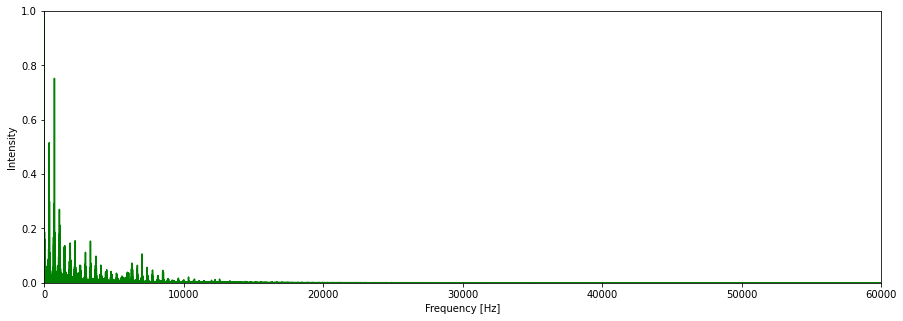

In [356]:
fig = plt.figure(figsize = (15,5))
plt.plot(f, EnvMag, color = "green")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Intensity")
plt.xlim(0, 60000) 
plt.ylim([0,1])
plt.show()

600Hzまでの範囲に変更する。<br>
Change the display range to 600Hz.

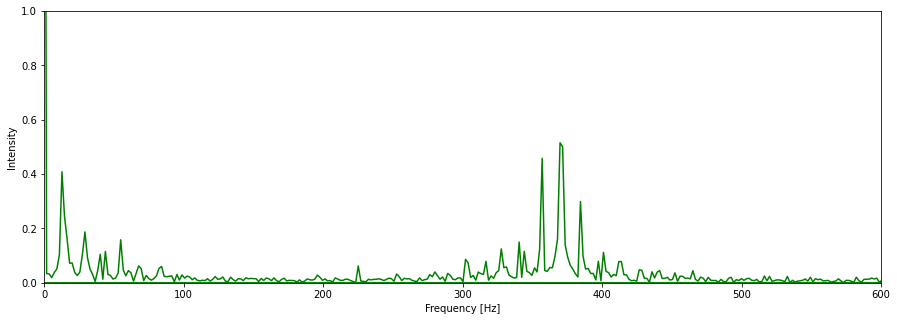

In [357]:
fig = plt.figure(figsize = (15,5))
plt.plot(f, EnvMag, color = "green")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Intensity")
plt.xlim(0, 600) 
plt.ylim([0,1])
plt.show()